In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
import math
import os.path
from os import path
from tqdm import tqdm

In [4]:
gesture_list = [
        "NormalWalking",
        "TapOuward",
        "TapInFrontOfTheOtherFoot",
        "TapInward",
        "BigStep", 
        "SmallStep",
        "ToeTapBehind",
        "ToeTapInFront",
        "TapWithHeel",
        "TapWithFootRotatedOutwards",
        "TapWithFootRotatedInwards",
        "Click",
        "KickInward",
        "KickOutward",
        "KickForward",
        "LiftInFront",
        "BendingBehind",
        "MidairRotationInwards",
        "MidairRotationOutwards",
        "DraggingInFront",
        "DraggingBehind",
        "Delay",
        "Rush"
    ]

In [5]:
# read data
df = pd.read_excel("../data/Post-Questionnaire (Responses).xlsx")

In [6]:
# initiate result data container
difficulty_by_gesture = dict()
disruption_by_gesture = dict()
social_by_gesture = dict()
for i in gesture_list:
  difficulty_by_gesture[i] = []
  disruption_by_gesture[i] = []
  social_by_gesture[i] = []

In [7]:
# parse data into containers
from collections import OrderedDict
for i in range(1, len(df.iloc[:, 0])):
  if df.iloc[i, 2] in gesture_list:
    difficulty_by_gesture[df.iloc[i, 2]].append(int(df.iloc[i, 3]))
    disruption_by_gesture[df.iloc[i, 2]].append(int(df.iloc[i, 4]))
    social_by_gesture[df.iloc[i, 2]].append(int(df.iloc[i, 5]))
difficulty_by_gesture = OrderedDict(reversed(list(difficulty_by_gesture.items())))
disruption_by_gesture = OrderedDict(reversed(list(disruption_by_gesture.items())))
social_by_gesture = OrderedDict(reversed(list(social_by_gesture.items())))

(b) Social Acceptability
(c) Walking Compatibility


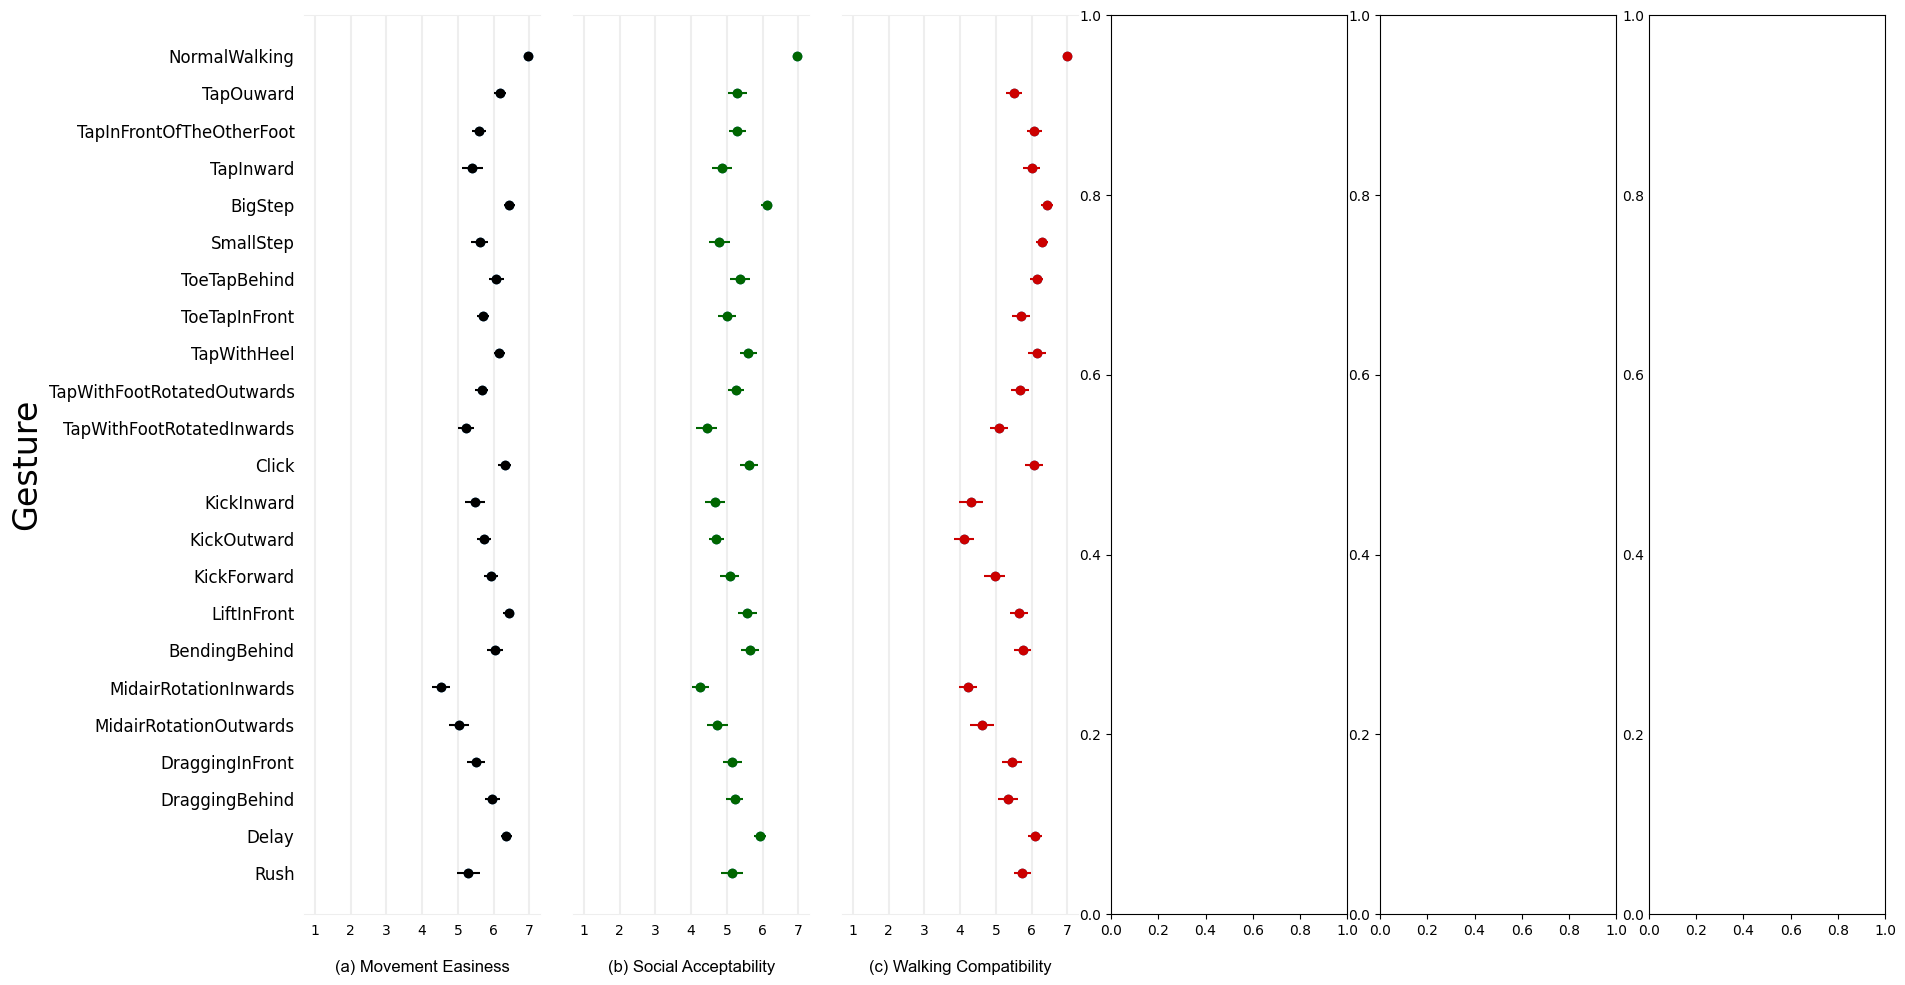

In [9]:
import matplotlib.pyplot as plt
import time
def subplot_subjective_score(names, scores, error, datacolor, subtitle, pole_min, pole_max, xrange, ax, isleftmost):
    #hfont = {'fontname':'Helvetica'}
    hfont = {'fontname':'Arial'}
    for i in xrange:
      ax.axvline(x=i, color='#EEEEEE', zorder=0)
    
    # setting xticks to be by integer 
    ax.set_xticks(xrange)

    #ax.set_xticklabels(names)

    #ax.set_xlim([0.5, 7.5])
  
    # setting margin between yticks

    #ax.yaxis.set_tick_params(labelsize=20)
    if isleftmost:
      ax.set_yticks(range(len(names)))
      ax.set_yticklabels(names, size = 12)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=True, labelbottom=True)
    else: 
      print(subtitle)
      ax.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=True)
    # plt.ylabel("X-axis", labelpad=0)
    # Control the scale and distance of the y-ticks
    plt.gca().yaxis.set_tick_params(length=0, width=0, direction='out')
    #plt.gca().xaxis.set_tick_params(length=0, width=0, direction='out')

    ax.errorbar(scores, range(len(names)), xerr=error, fmt='o', color=datacolor)
    ax.scatter(scores, range(len(names)))
    # remove left and right border of plot
    ax.spines['right'].set_visible(False)

    ax.spines['left'].set_visible(False)

    # set top and bottom border color of plot to grey
    ax.spines['top'].set_color('#EEEEEE')
    ax.spines['bottom'].set_color('#EEEEEE')
    #ax.text(7, 23.5, pole_max, size = 8, ha = 'center')
    #ax.text(1, 23.5, pole_min, size = 8, ha = 'center')
    ax.set_xlabel(subtitle, labelpad=16, size = 12, **hfont)
    if isleftmost:
      ax.set_ylabel("Gesture", size = 24)
    # ax.set_title("Error Rate vs. Score")
    # plt.colorbar()
    plt.rcParams['figure.figsize'] = [16, 9]

fig, ax = plt.subplots(1, 6)
fig.tight_layout(pad = -1)
subplot_subjective_score(names = difficulty_by_gesture.keys(), 
                      scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture], 
                      error = [np.std(difficulty_by_gesture[i]) / np.sqrt(len(difficulty_by_gesture[i])) for i in difficulty_by_gesture],
                      datacolor = "black", subtitle = "(a) Movement Easiness", pole_min = "very difficult", pole_max = "very easy", xrange = range(1, 8), ax = ax[0], isleftmost = True)
subplot_subjective_score(names = social_by_gesture.keys(), 
                      scores = [sum(social_by_gesture[i]) / len(social_by_gesture[i]) for i in social_by_gesture], 
                      error = [np.std(social_by_gesture[i]) / np.sqrt(len(social_by_gesture[i])) for i in social_by_gesture],
                      datacolor = "#006600", subtitle = "(b) Social Acceptability", pole_min = "very\nuncomfortable", pole_max = "very\ncomfortable", xrange = range(1, 8), ax = ax[1], isleftmost = False)
subplot_subjective_score(names = disruption_by_gesture.keys(), 
                      scores = [sum(disruption_by_gesture[i]) / len(disruption_by_gesture[i]) for i in disruption_by_gesture], 
                      error = [np.std(disruption_by_gesture[i]) / np.sqrt(len(disruption_by_gesture[i])) for i in disruption_by_gesture],
                      datacolor = "#cc0000", subtitle = "(c) Walking Compatibility", pole_min = "very much", pole_max = "very little", xrange = range(1, 8), ax = ax[2], isleftmost = False)
# subplot_subjective_score(names = duration_all.keys(), 
#                       scores = [sum(duration_all[i]) / len(duration_all[i]) for i in duration_all], 
#                       error = [np.std(duration_all[i]) / np.sqrt(len(duration_all[i])) for i in duration_all],
#                       datacolor = "#4c72b0", subtitle = "(d) Overall Duration (s)", pole_min = "", pole_max = "", xrange = range(6, 17, 2), ax = ax[3], isleftmost = False)
# subplot_subjective_score(names = duration_t1.keys(), 
#                       scores = [sum(duration_t1[i]) / len(duration_t1[i]) for i in duration_t1], 
#                       error = [np.std(duration_t1[i]) / np.sqrt(len(duration_t1[i])) for i in duration_t1],
#                       datacolor = "#4c72b0", subtitle = "(e) Trial 1 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[4], isleftmost = False)
# subplot_subjective_score(names = duration_t2.keys(), 
#                       scores = [sum(duration_t2[i]) / len(duration_t2[i]) for i in duration_t2], 
#                       error = [np.std(duration_t2[i]) / np.sqrt(len(duration_t2[i])) for i in duration_t2],
#                       datacolor = "#4c72b0", subtitle = "(f) Trial 2 Duration (s)", pole_min = "", pole_max = "", xrange = range(2, 8), ax = ax[5], isleftmost = False)

#plt.figure(facecolor='white')
#plt.show()
timestr = time.strftime("%Y-%m-%d %H-%M-%S")
plt.savefig("Subjective Score " + timestr + ".png", bbox_inches="tight")

In [12]:
scores = [sum(difficulty_by_gesture[i]) / len(difficulty_by_gesture[i]) for i in difficulty_by_gesture]
error = [np.std(difficulty_by_gesture[i]) / np.sqrt(len(difficulty_by_gesture[i])) for i in difficulty_by_gesture]

In [13]:
# k means clustering by difficulty_by_gesture

# Importing the libraries   
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# compute kmeans based on difficulty_by_gesture
KMeans = KMeans(n_clusters=3, random_state=0).fit(scores)
labels = KMeans.labels_
centroids = KMeans.cluster_centers_
print(labels)
print(centroids)

ValueError: Expected 2D array, got 1D array instead:
array=[5.2962963  6.35714286 5.96296296 5.51851852 5.03846154 4.52173913
 6.03571429 6.42307692 5.92592593 5.74074074 5.48148148 6.30769231
 5.23333333 5.66666667 6.16       5.7037037  6.07407407 5.60714286
 6.44444444 5.40740741 5.59259259 6.18518519 6.96296296].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [1]:
%pip install scikit-learn

     ---------------------------------------- 9.2/9.2 MB 11.8 MB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip
